Name: Vilma Hietala 
<br>Date: 22/01/2024
<br>Prepare training and testing datasets (steps 1-10), make the predictions (step 11)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#settings:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 900)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## 1. Drop unrelevant columns
- PassengerId
- Cabin information because high amount on NaN values and it's not important information
- Ticket

In [3]:
train_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

## 2. Convert 'Sex' column values into numerical format

In [4]:
train_data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
test_data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

## 3. Create new column: 'SibSp' + 'Parch' = 'Familysize' and drop original columns

In [5]:
train_data['Familysize'] = train_data['SibSp'] + train_data['Parch'] + 1 # the person is the 1
test_data['Familysize'] = test_data['SibSp'] + test_data['Parch'] + 1 # the person is the 1

In [6]:
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

## 4. Replace 2 NaN values in train_data column 'Embarked'
I identified the NaN values in the file "explore_training_data.ipynb"

In [7]:
first_class_females = train_data.loc[(train_data["Pclass"]==1) & (train_data["Sex"]==1)]
mode_value = first_class_females['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_value, inplace=True)

## 5. Use get_dummies in column 'Embarked'

In [8]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix_sep="_", prefix="Embarked")
test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix_sep="_", prefix="Embarked")

## 6. 'Name' column - take relevant information, change into numerical format in new column & drop the old column

In [9]:
train_data['Title'] = train_data.Name.str.extract("([A-Za-z]+)\.")
test_data['Title'] = test_data.Name.str.extract("([A-Za-z]+)\.")

In [10]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [11]:
train_data.replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 1, inplace=True)
train_data.replace(['Mlle', 'Ms', 'Miss'], 2, inplace = True)
train_data.replace(["Mme", "Mrs"], 3, inplace=True)  
train_data.replace("Master", 4, inplace=True)  
train_data.replace("Mr", 5, inplace=True)  

test_data.replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 1, inplace=True)
test_data.replace(['Mlle', 'Ms', 'Miss'], 2, inplace = True)
test_data.replace(["Mme", "Mrs"], 3, inplace=True)  
test_data.replace("Master", 4, inplace=True)
test_data.replace("Mr", 5, inplace=True)  

- 1 includes various titles such as military ranks, family titles, religious titles
- 2 includes unmarried women
- 3 includes married women
- 4 includes the title 'Master,' which historically was used to address boys or young male children
- 5 includes general title for adult males


In [12]:
train_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)

## 7. Handle NaN values in column "Age"

In [13]:
train_data.groupby(['Title', 'Pclass'])['Age'].mean()

Title  Pclass
1      1         47.571429
       2         42.000000
2      1         29.744681
       2         22.560606
       3         16.123188
3      1         40.400000
       2         33.682927
       3         33.515152
4      1          5.306667
       2          2.258889
       3          5.350833
5      1         41.580460
       2         32.768293
       3         28.724891
Name: Age, dtype: float64

In [14]:
train_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Title', 'Pclass'])['Age'].transform('mean'))

In [15]:
test_data['Age'] = test_data['Age'].fillna(test_data.groupby(['Title', 'Pclass'])['Age'].transform('mean'))

## 8. Handle outliers in column "Fare"

In [16]:
train_data["Fare"].max()

512.3292

In [17]:
test_data["Fare"].max()

512.3292

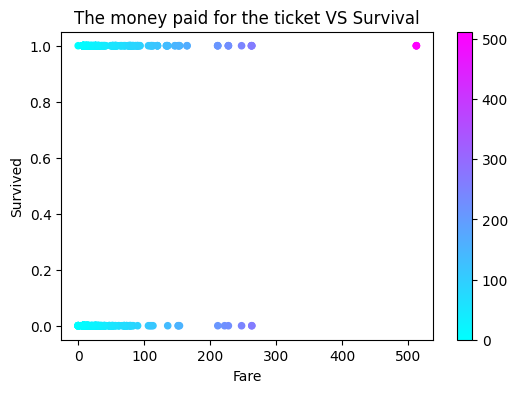

In [18]:
Fare = train_data.plot.scatter(x='Fare',
                        y= 'Survived',
                        title = ('The money paid for the ticket VS Survival'),
                        c=train_data['Fare'],
                        cmap='cool',
                        figsize=(6,4))

In [19]:
under_300 = train_data.loc[train_data["Fare"] >= 300, "Fare"] = 300
under_300_2 = test_data.loc[test_data["Fare"] >= 300, "Fare"] = 300

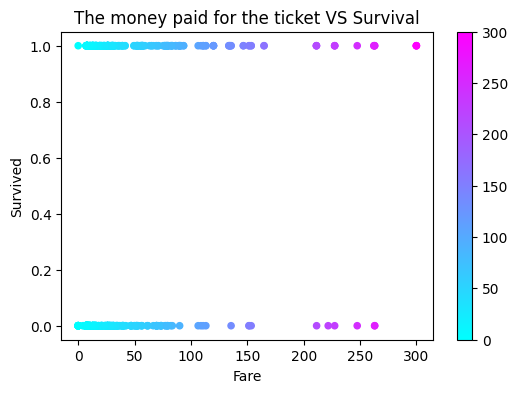

In [20]:
Fare = train_data.plot.scatter(x='Fare',
                        y= 'Survived',
                        title = ('The money paid for the ticket VS Survival'),
                        c=train_data['Fare'],
                        cmap='cool',
                        figsize=(6,4))

In [21]:
train_data["Fare"].max()

300.0

In [22]:
test_data["Fare"].max()

300.0

## 9. Fill NaN value in test_data 'Fare' column

In [23]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Familysize    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Title         0
dtype: int64

In [24]:
test_data.isna().sum()

Pclass        0
Sex           0
Age           0
Fare          1
Familysize    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Title         0
dtype: int64

In [25]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

## 10. Scale the data

In [26]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

scaler_train.fit(train_data.values)
scaler_test.fit(test_data.values)

train_scaled = pd.DataFrame(scaler_train.transform(train_data.values), columns=train_data.columns)
test_scaled = pd.DataFrame(scaler_test.transform(test_data.values), columns=test_data.columns)

In [27]:
train_scaled.head()

,Survived,Pclass,Sex,Age,Fare,Familysize,Embarked_C,Embarked_Q,Embarked_S,Title
0,0.0,1.0,0.0,0.271174,0.024167,0.1,0.0,0.0,1.0,1.00
1,1.0,0.0,1.0,0.472229,0.237611,0.1,1.0,0.0,0.0,0.50
2,1.0,1.0,1.0,0.321438,0.026417,0.0,0.0,0.0,1.0,0.25
3,1.0,0.0,1.0,0.434531,0.177000,0.1,0.0,0.0,1.0,0.50
4,0.0,1.0,0.0,0.434531,0.026833,0.0,0.0,0.0,1.0,1.00


In [28]:
train_scaled.Familysize.value_counts()

0.0    537
0.1    161
0.2    102
0.3     29
0.5     22
0.4     15
0.6     12
1.0      7
0.7      6
Name: Familysize, dtype: int64

In [29]:
train_scaled.Title.value_counts()

1.00    517
0.25    185
0.50    126
0.75     40
0.00     23
Name: Title, dtype: int64

## 11. Predict

In [30]:
X = train_scaled.drop('Survived', axis=1)
y = train_scaled['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
LogisticRegression_model = LogisticRegression(max_iter=1000)
LogisticRegression_model.fit(X_train, y_train)
LogisticRegression_pred = LogisticRegression_model.predict(X_test)
LogisticRegression_acc = metrics.accuracy_score(y_test,LogisticRegression_pred)
LogisticRegression_acc

0.8432835820895522

In [32]:
DecisionTreeClassifier_model = DecisionTreeClassifier(max_depth=4)
DecisionTreeClassifier_model.fit(X_train, y_train)
DecisionTreeClassifier_pred = DecisionTreeClassifier_model.predict(X_test)
DecisionTreeClassifier_acc = metrics.accuracy_score(y_test,DecisionTreeClassifier_pred)
DecisionTreeClassifier_acc

0.8582089552238806

In [33]:
random_forrest = RandomForestClassifier(n_estimators=100)
random_forrest.fit(X_train, y_train)
random_forrest_pred = random_forrest.predict(X_test)
random_forrest_acc = metrics.accuracy_score(y_test,random_forrest_pred)
random_forrest_acc

0.8134328358208955

In [34]:
voting_classifier_hard = VotingClassifier(
    estimators = [('Model1', DecisionTreeClassifier(max_depth=4)),
                  ('Model2', LogisticRegression(max_iter=1000)),
                  ('Model3', RandomForestClassifier(n_estimators=100))],
    voting="hard")


voting_classifier_soft = VotingClassifier(
    estimators = [('Model1', DecisionTreeClassifier(max_depth=4)),
                  ('Model2', LogisticRegression(max_iter=1000)),
                  ('Model3', RandomForestClassifier(n_estimators=100))],
    voting="soft")

voting_classifier_hard.fit(X_train, y_train)
pred_hard = voting_classifier_hard.predict(test_scaled)

voting_classifier_soft.fit(X_train, y_train)
pred_soft = voting_classifier_soft.predict(test_scaled)

In [35]:
data_passengerid = pd.read_csv('test.csv')
my_submission = pd.DataFrame({"PassengerId": data_passengerid.PassengerId, "Survived": pred_hard})
my_submission['Survived'] = my_submission['Survived'].astype(int)

In [36]:
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
my_submission.to_csv("submission.csv", index=False)